This project is intended to give you experience with visualizing data sets. Due Friday Sept 21st 2018, 5pm EST.

We will work (again) with data/iris.csv, which contains data from the iris data set.

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Python code fixing mistakes in the original data

In [21]:
# reading file into a variable and formatting it as a DataFrame
iris = pd.read_csv("iris.csv")
df = pd.DataFrame(data= iris)

In [22]:
# finding and replacing errors in the data and saving into the same DataFrame
df.iloc[34][0:5]
df.iat[34,3]=0.2
df.iloc[34][0:5]
df.iloc[37][0:5]
df.iat[37,1]=3.6
df.iat[37,2]=1.4
df.iloc[37][0:5]

Sepal.Length       4.9
Sepal.Width        3.6
Petal.Length       1.4
Petal.Width        0.1
Species         setosa
Name: 37, dtype: object

In [23]:
#Petal ratio: Petal Length/Petal Width
df['Petal ratio'] = df['Petal.Length'] / df['Petal.Width']
#Sepal ratio: Sepal Length/Sepal Width
df['Sepal ratio'] = df['Sepal.Length'] / df['Sepal.Width']
#df.head(38)

In [24]:
# Grouping data by species and running descriptive statistics on the petal and sepal ratios
setgroup = df[["Species","Petal ratio","Sepal ratio"]].groupby('Species')
descriptgroup = setgroup.describe()
descriptgroup

Petal ratio                                                    \
                 count      mean       std       min       25%       50%   
Species                                                                    
setosa            50.0  6.908000  2.854545  2.666667  4.687500  7.000000   
versicolor        50.0  3.242837  0.312456  2.666667  3.016667  3.240385   
virginica         50.0  2.780662  0.407367  2.125000  2.511364  2.666667   

                           Sepal ratio                                \
                 75%   max       count      mean       std       min   
Species                                                                
setosa      7.500000  15.0        50.0  1.470188  0.118750  1.268293   
versicolor  3.417582   4.1        50.0  2.160402  0.228658  1.764706   
virginica   3.055556   4.0        50.0  2.230453  0.246992  1.823529   

                                                    
                 25%       50%       75%       max  
Species                                             
setosa      1.385684  1.463063  1.541444  1.956522  
versicolor  2.033929  2.161290  2.232692  2.818182  
virginica   2.031771  2.169540  2.342949  2.961538

# Part 1

<function matplotlib.pyplot.show>

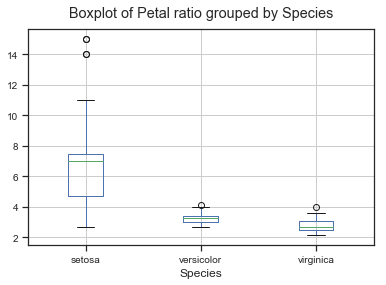

In [25]:
# Generation of box and whisker plot using pandas function
df.boxplot(by="Species",column ='Petal ratio', fontsize = 10)
plt.suptitle("Boxplot of Petal ratio grouped by Species")
plt.title("")
plt.show

### Procedure for dealing with plot features
Outliers are traditionally dealt with by calculating the Interquartile Ranges of the data. The Interquartile Range of a data set is defined to be the difference between the 75th percentile or the 3rd quartile and the 25th percentile or the 1st quartile. Any point that exists beyond 1.5IQR of the 1st and 3rd quartiles, ***(Q1-1.5IQR, Q3+1.5IQR)*** is classified as a moderate outlier. Any point that exists beyond 3IQR of the 1st and 3rd quartiles, ***(Q1-3IQR, Q3+3IQR)*** is classified as an extreme outlier. In the case of the petal ratio for each species in the iris data there are only upper outliers. The moderate outliers in the plot above are open circles, where extreme outliers are closed circles, so there are only moderate outliers in the data. There are a few ways to deal with outliers. 

Prior to taking action against outliers, we can transform the data to see if the transformed values eliminate the outliers.  Such transformations include square root, log, and inverse transformations.  If there still remain outliers there are a few ways that they can be dealt with:

1] Imputation in which the outlier is either replaced by the variable mean or changed to a predicted value using regression. 

2] Deletion in which the outlier value is completely removed from the data.  In the case of the iris data, imputation is a more reasonable option than deletion.

In [26]:
# quantile 1 for each species
q1s = df[df['Species']=='setosa' ]['Petal ratio'].quantile(0.25)
q1ver = df[df['Species']=='versicolor' ]['Petal ratio'].quantile(0.25)
q1vir = df[df['Species']=='virginica' ]['Petal ratio'].quantile(0.25)

# median for each species
meds = df[df['Species']=='setosa' ]['Petal ratio'].median()
medver = df[df['Species']=='versicolor' ]['Petal ratio'].median()
medvir = df[df['Species']=='virginica' ]['Petal ratio'].median()

# mean for each species
means = df[df['Species']=='setosa' ]['Petal ratio'].mean()
meanver = df[df['Species']=='versicolor' ]['Petal ratio'].mean()
meanvir = df[df['Species']=='virginica' ]['Petal ratio'].mean()

# quantile 3 for each species
q3s = df[df['Species']=='setosa' ]['Petal ratio'].quantile(0.75)
q3ver = df[df['Species']=='versicolor' ]['Petal ratio'].quantile(0.75)
q3vir = df[df['Species']=='virginica' ]['Petal ratio'].quantile(0.75)

# IQR for each species
iqrs = q3s-q1s
iqrver = q3ver-q1ver
iqrvir = q3vir-q1vir

#print meds, medver, medvir
#print means, meanver, meanvir
#print iqrs, iqrver, iqrvir

In [28]:
# Moderate outlier boundaries for each species
mos = [q1s - 1.5*iqrs, q3s + 1.5*iqrs]
mover = [q1ver - 1.5*iqrver, q3ver + 1.5*iqrver]
movir = [q1vir - 1.5*iqrvir, q3vir + 1.5*iqrvir]

# Extreme outliers boundaries for each species
eos = [q1s - 3*iqrs, q3s + 3*iqrs]
eover = [q1ver - 3*iqrver, q3ver + 3*iqrver]
eovir = [q1vir - 3*iqrvir, q3vir + 3*iqrvir]

# Upper outlier boundaries
obs = [q3s + 1.5*iqrs, q3s + 3*iqrs]
obver = [q3ver + 1.5*iqrver, q3ver + 3*iqrver]
obvir = [q3vir + 1.5*iqrvir, q3vir + 3*iqrvir]
print "Setosa Petal ratio boundaries: ",obs
print "Versicolor Petal ratio boundaries: ",obver 
print "Virginica Petal ratio boundaries: ",obvir

Setosa Petal ratio boundaries:  [11.71875, 15.9375]
Versicolor Petal ratio boundaries:  [4.018956043956045, 4.620329670329672]
Virginica Petal ratio boundaries:  [3.8718434343434343, 4.688131313131313]


Any point found within the boundaries listed above is a moderate outlier for the respective species petal ratio, and any point which is greater than the upper boundary is an extreme outlier, this data contains only moderate outliers.

The box in the box and whisker plot consists of the 1st and 3rd quartile in blue, and the 2nd quartile or median is the green line within the box. The boundaries at the ends of the whiskers are the upper and lower fence.  These are usually the minimum or maximum of the data, if no flagged or suspected outliers are present.  In this case the lower fence for each species boxplot is the minimum of the data.  Whereas the upper fence for each species is not the absolute maximum of the data, given that all species boxplots contain at least one outlier.  

# Part 2

<function matplotlib.pyplot.show>

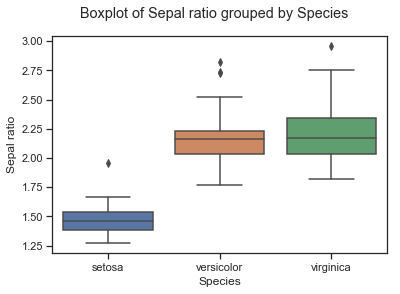

In [30]:
# Generation of box and whisker plot using seaborn function
import seaborn as sns
sns.boxplot(x="Species", y='Sepal ratio', data = df)
plt.suptitle("Boxplot of Sepal ratio grouped by Species")
plt.title("")
plt.show

The filled boxes in the box and whisker plots consists of the 1st and 3rd quartile, and the 2nd quartile or median is the line within the box. The boundaries at the ends of the whiskers are the upper and lower fence.  These are usually the minimum or maximum of the data, if no flagged or suspected outliers are present.  In this case the lower fence for each species boxplot is the minimum of the data.  Whereas the upper fence for each species is not the absolute maximum of the data, given that all species boxplots contain at least one outlier.

Outliers can be dealt with using the same procedure as previously described in the pandas box plot discussion.

In [31]:
# quantile 1 for each species
q1s = df[df['Species']=='setosa' ]['Sepal ratio'].quantile(0.25)
q1ver = df[df['Species']=='versicolor' ]['Sepal ratio'].quantile(0.25)
q1vir = df[df['Species']=='virginica' ]['Sepal ratio'].quantile(0.25)

# median for each species
meds = df[df['Species']=='setosa' ]['Sepal ratio'].median()
medver = df[df['Species']=='versicolor' ]['Sepal ratio'].median()
medvir = df[df['Species']=='virginica' ]['Sepal ratio'].median()

# mean for each species
means = df[df['Species']=='setosa' ]['Sepal ratio'].mean()
meanver = df[df['Species']=='versicolor' ]['Sepal ratio'].mean()
meanvir = df[df['Species']=='virginica' ]['Sepal ratio'].mean()

# quantile 3 for each species
q3s = df[df['Species']=='setosa' ]['Sepal ratio'].quantile(0.75)
q3ver = df[df['Species']=='versicolor' ]['Sepal ratio'].quantile(0.75)
q3vir = df[df['Species']=='virginica' ]['Sepal ratio'].quantile(0.75)

# IQR for each species
iqrs = q3s-q1s
iqrver = q3ver-q1ver
iqrvir = q3vir-q1vir

#print meds, medver, medvir
#print means, meanver, meanvir
#print iqrs, iqrver, iqrvir

In [14]:
# Moderate outlier boundaries for each species
mos = [q1s - 1.5*iqrs, q3s + 1.5*iqrs]
mover = [q1ver - 1.5*iqrver, q3ver + 1.5*iqrver]
movir = [q1vir - 1.5*iqrvir, q3vir + 1.5*iqrvir]

# Extreme outliers boundaries for each species
eos = [q1s - 3*iqrs, q3s + 3*iqrs]
eover = [q1ver - 3*iqrver, q3ver + 3*iqrver]
eovir = [q1vir - 3*iqrvir, q3vir + 3*iqrvir]

# Upper outlier boundaries
obs = [q3s + 1.5*iqrs, q3s + 3*iqrs]
obver = [q3ver + 1.5*iqrver, q3ver + 3*iqrver]
obvir = [q3vir + 1.5*iqrvir, q3vir + 3*iqrvir]
print "Setosa Sepal ratio boundaries: ",obs
print "Versicolor Sepal ratio boundaries: ",obver 
print "Virginica Sepal ratio boundaries: ",obvir

Setosa Sepal ratio boundaries:  [1.7750839846428084, 2.008724119018237]
Versicolor Sepal ratio boundaries:  [2.530837912087912, 2.8289835164835164]
Virginica Sepal ratio boundaries:  [2.809715544871794, 3.2764823717948706]


Any point found within the boundaries listed above is a moderate outlier for the respective species petal ratio, and any point which is greater than the upper boundary is an extreme outlier, this data contains only moderate outliers.

# Part 3

A violin plot is very similar to a box and whisker plot in that it is an illustration of the distribution of the data points for a variable.  However where box plots show only the 5 figure summary of the data with any possible outliers, violin plots provide a snapshot of the distribution curve for the data.  Violin plots provide an estimation of the distribution pattern followed by the datapoints. 

<function matplotlib.pyplot.show>

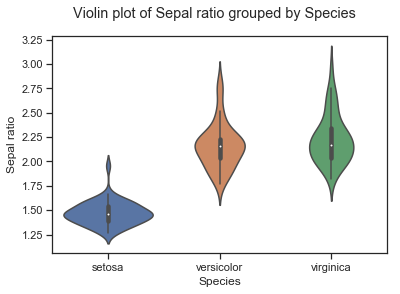

In [32]:
# generation of a violin plot for iris data using seaborn
sns.violinplot(x="Species",y='Sepal ratio',data=df)
plt.suptitle("Violin plot of Sepal ratio grouped by Species")
plt.title("")
plt.show

The pros of violin plots include showing multimodal data along with an illustration of skewness.
The cons of violin plots include that the number of data points is much more difficult to determine from the graph than from box plots.
The pros of box plots are that they are: compact, clear differences between groups, illustrates normaliyt and skewness.
The cons of box plots include that they hide multimodal, sometimes obscures the number of data points (n), and are have many variations.

# Part 4

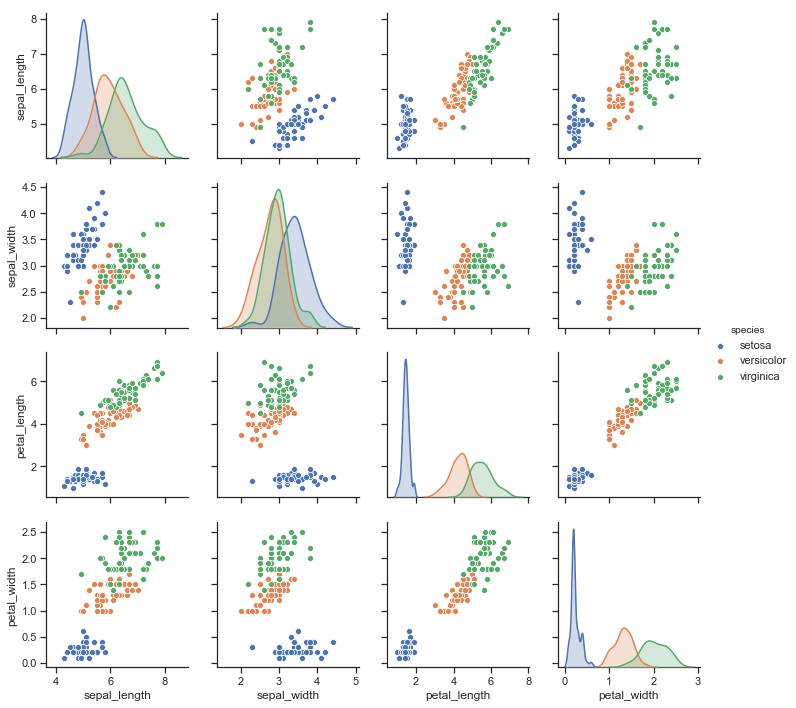

In [50]:
# Generation of a scatter matrix plot with point colored by species
# code found at: 
# https://seaborn.pydata.org/examples/scatterplot_matrix.html
sns.set(style="ticks")
df = sns.load_dataset('iris')
sns.pairplot(df, hue="species")